# U.S. Domestic Flights from 2000 - 2009
Over 3.5 million monthly domestic flight records from 2000 to 2009. The dataset has following parameters to explore:

* Origin - String - Three letter airport code of the origin airport
* Destination - String - Three letter airport code of the destination airport
* Origin City - String - Origin city name
* Destination City - String - Destination city name
* Passengers - Integer - Number of passengers transported from origin to destination
* Seats - Integer - Number of seats available on flights from origin to destination
* Flights - Integer - Number of flights between origin and destination (multiple records for one month, many with flights > 1)
* Distance - Integer - Distance (to nearest mile) flown between origin and destination
* Fly Date - Integer - The date (yyyymm) of flight
* Origin Population - Integer - Origin city's population as reported by US Census
* Destination Population

In [1]:
# Import libraries for the EDA
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Read the U.S. Domestic Flight from 2000 to 2009 dataset
flights_df = pd.read_csv('../data/flights.csv')
flights_df.head()

ID Origin Destination Origin City Origin State  \
0       AberdeenHuron00200807    ABR         HON    Aberdeen           SD   
1     AberdeenHuron2757200611    ABR         HON    Aberdeen           SD   
2  AberdeenHuron3051170200702    ABR         HON    Aberdeen           SD   
3     AberdeenHuron3076200704    ABR         HON    Aberdeen           SD   
4  AberdeenHuron3121170200706    ABR         HON    Aberdeen           SD   

  Destination City Destination State  Passengers  Seats  Flights  Distance  \
0            Huron                SD           0      0        1        74   
1            Huron                SD          27     57        3        74   
2            Huron                SD         305   1170       39        74   
3            Huron                SD          30     76        4        74   
4            Huron                SD         312   1170       39        74   

   Fly Date  Origin Population  Destination Population  
0    200807              38991                   15946  
1    200611              38886                   15501  
2    200702              39026                   15760  
3    200704              39026                   15760  
4    200706              39026                   15760

In [3]:
flights_df.shape

(591438, 14)

In [4]:
# Removing the spaces from the column names and replace with underscore
flights_df.columns = flights_df.columns.str.replace(' ', '_')
flights_df.head()

ID Origin Destination Origin_City Origin_State  \
0       AberdeenHuron00200807    ABR         HON    Aberdeen           SD   
1     AberdeenHuron2757200611    ABR         HON    Aberdeen           SD   
2  AberdeenHuron3051170200702    ABR         HON    Aberdeen           SD   
3     AberdeenHuron3076200704    ABR         HON    Aberdeen           SD   
4  AberdeenHuron3121170200706    ABR         HON    Aberdeen           SD   

  Destination_City Destination_State  Passengers  Seats  Flights  Distance  \
0            Huron                SD           0      0        1        74   
1            Huron                SD          27     57        3        74   
2            Huron                SD         305   1170       39        74   
3            Huron                SD          30     76        4        74   
4            Huron                SD         312   1170       39        74   

   Fly_Date  Origin_Population  Destination_Population  
0    200807              38991                   15946  
1    200611              38886                   15501  
2    200702              39026                   15760  
3    200704              39026                   15760  
4    200706              39026                   15760

In [5]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591438 entries, 0 to 591437
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ID                      591438 non-null  object
 1   Origin                  591438 non-null  object
 2   Destination             591438 non-null  object
 3   Origin_City             591438 non-null  object
 4   Origin_State            591438 non-null  object
 5   Destination_City        591438 non-null  object
 6   Destination_State       591438 non-null  object
 7   Passengers              591438 non-null  int64 
 8   Seats                   591438 non-null  int64 
 9   Flights                 591438 non-null  int64 
 10  Distance                591438 non-null  int64 
 11  Fly_Date                591438 non-null  int64 
 12  Origin_Population       591438 non-null  int64 
 13  Destination_Population  591438 non-null  int64 
dtypes: int64(7), object(7)
memory usage:

## Cleaning Process
Step 1: Verify and rectify null values.

Thoroughly examining the dataset to identify any fields or columns that contain missing values. 
Addressing null values ensures data integrity and prevents potential issues in downstream analyses. 

Step 2: Inspect and resolve duplicate values.

Identify duplicates, compare the records or rows in the dataset. 
Keep only the first occurrence (removing subsequent duplicates) to ensures data consistency and prevents statistical bias in analysis. 

In [6]:
# Removing white space from the Origin and Destination States
flights_df['Origin_State'] = flights_df['Origin_State'].str.strip()
flights_df['Destination_State'] = flights_df['Destination_State'].str.strip()

In [7]:
# checking for null values
flights_df.isnull().any()

ID                        False
Origin                    False
Destination               False
Origin_City               False
Origin_State              False
Destination_City          False
Destination_State         False
Passengers                False
Seats                     False
Flights                   False
Distance                  False
Fly_Date                  False
Origin_Population         False
Destination_Population    False
dtype: bool

In [8]:
# checking for NaN values
flights_df.isna().any()

ID                        False
Origin                    False
Destination               False
Origin_City               False
Origin_State              False
Destination_City          False
Destination_State         False
Passengers                False
Seats                     False
Flights                   False
Distance                  False
Fly_Date                  False
Origin_Population         False
Destination_Population    False
dtype: bool

In [9]:
# Checking and counting duplicates in dataset
flights_df.duplicated().value_counts()

False    581063
True      10375
dtype: int64

In [10]:
# looking at all the duplicate rows
flights_df.loc[flights_df.duplicated()]

ID Origin Destination Origin_City Origin_State  \
156         AbileneDallas00200604    ABI         AFW     Abilene           TX   
2142         AlbanyAlbany00200212    ALB         ALB      Albany           NY   
3989        AlbanyDetroit00200401    ABY         YIP      Albany           GA   
4317      AlbanyDetroit4150200301    ALB         DTW      Albany           NY   
4663         AlbanyMobile00200612    ABY         BFM      Albany           GA   
...                           ...    ...         ...         ...          ...   
591251  YoungstownDetroit00200802    YNG         YIP  Youngstown           OH   
591254  YoungstownDetroit00200804    YNG         YIP  Youngstown           OH   
591258  YoungstownDetroit00200805    YNG         YIP  Youngstown           OH   
591260  YoungstownDetroit00200806    YNG         YIP  Youngstown           OH   
591401         YumaSalina00200302    YUM         SLN        Yuma           AZ   

       Destination_City Destination_State  Passengers  Seats  Flights  \
156              Dallas                TX           0      0        1   
2142             Albany                NY           0      0        0   
3989            Detroit                MI           0      0        1   
4317            Detroit                MI          41     50        1   
4663             Mobile                AL           0      0        1   
...                 ...               ...         ...    ...      ...   
591251          Detroit                MI           0      0        1   
591254          Detroit                MI           0      0        1   
591258          Detroit                MI           0      0        1   
591260          Detroit                MI           0      0        1   
591401           Salina                KS           0      0        2   

        Distance  Fly_Date  Origin_Population  Destination_Population  
156          143    200604             158704                11998822  
2142           0    200212             833752                  833752  
3989         739    200401             161489                 8996622  
4317         488    200301             839741                 8985512  
4663         238    200612             162975                  402199  
...          ...       ...                ...                     ...  
591251       163    200802             566425                 8847562  
591254       163    200804             566425                 8847562  
591258       163    200805             566425                 8847562  
591260       163    200806             566425                 8847562  
591401      1041    200302             169297                   59829  

[10375 rows x 14 columns]

In [11]:
# Drop duplicate rows and keep the first occurrence
flights_df.drop_duplicates(inplace=True)

# Save the cleaned DataFrame to a new CSV file
output_file = '../data/flights_clean.csv'
flights_df.to_csv(output_file, index=False)

print(f"Duplicates removed. Saved to {output_file}")

Duplicates removed. Saved to ../data/flights_clean.csv


In [12]:
flights_clean_df = pd.read_csv('../data/flights_clean.csv')
flights_clean_df.head()

ID Origin Destination Origin_City Origin_State  \
0       AberdeenHuron00200807    ABR         HON    Aberdeen           SD   
1     AberdeenHuron2757200611    ABR         HON    Aberdeen           SD   
2  AberdeenHuron3051170200702    ABR         HON    Aberdeen           SD   
3     AberdeenHuron3076200704    ABR         HON    Aberdeen           SD   
4  AberdeenHuron3121170200706    ABR         HON    Aberdeen           SD   

  Destination_City Destination_State  Passengers  Seats  Flights  Distance  \
0            Huron                SD           0      0        1        74   
1            Huron                SD          27     57        3        74   
2            Huron                SD         305   1170       39        74   
3            Huron                SD          30     76        4        74   
4            Huron                SD         312   1170       39        74   

   Fly_Date  Origin_Population  Destination_Population  
0    200807              38991                   15946  
1    200611              38886                   15501  
2    200702              39026                   15760  
3    200704              39026                   15760  
4    200706              39026                   15760

In [13]:
flights_clean_df.shape

(581063, 14)

## Analyze
Analyze and create visualization to give insigts to data

In [14]:
flights_clean_df.describe()

Passengers          Seats        Flights       Distance  \
count  581063.000000  581063.000000  581063.000000  581063.000000   
mean     2909.146332    4061.738018      39.523196     681.095608   
std      4908.347834    6505.938167      51.368126     556.246830   
min         0.000000       0.000000       0.000000       0.000000   
25%        88.000000     140.000000       2.000000     278.000000   
50%      1008.000000    1530.000000      23.000000     554.000000   
75%      3638.000000    5180.000000      58.000000     921.000000   
max     73505.000000   94350.000000     730.000000    4962.000000   

            Fly_Date  Origin_Population  Destination_Population  
count  581063.000000       5.810630e+05            5.810630e+05  
mean   200473.885579       5.433403e+06            8.833980e+06  
std       279.634401       7.790718e+06            6.845352e+06  
min    200001.000000       1.300500e+04            1.288700e+04  
25%    200211.000000       8.346850e+05            1.464309e+06  
50%    200503.000000       2.030691e+06            8.917782e+06  
75%    200708.000000       6.519890e+06            1.823546e+07  
max    200912.000000       3.813959e+07            1.916113e+07

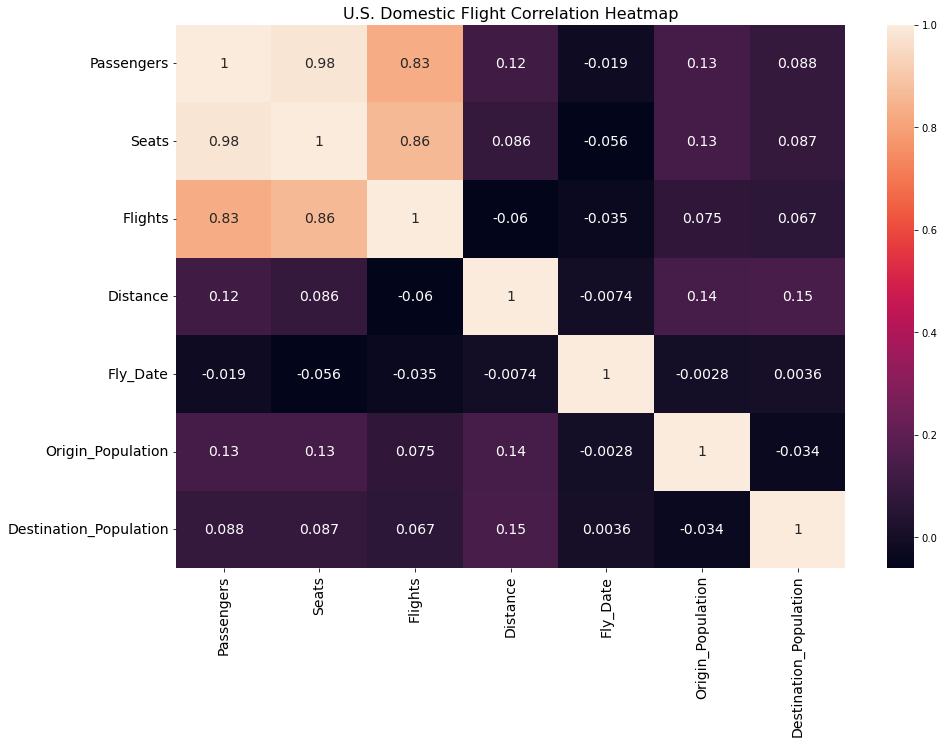

In [15]:
# Creating a heatmap with a larger size and a different color map
plt.figure(figsize=(15, 10))  # Increase the size of the heatmap

# You can change the color map by specifying a different colormap (e.g., 'coolwarm')
sns.heatmap(flights_clean_df.corr(), annot=True, annot_kws={"size": 14})

# Increase font size of x-axis and y-axis labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set a title for the heatmap (you can modify this title as needed)
plt.title("U.S. Domestic Flight Correlation Heatmap", fontsize=16)

# Display the heatmap
plt.show()

In the heatmap presented above, it's evident that the shade of colour indicates the strength of correlation. Specifically:
* Strong Positive Correlation: Passengers and Seats, Passengers and Flights
* Strong Negative Correlation: Passengers and Fly Date, Seats and Fly Date, Flights and Fly Date, Distance and Fly Date

In this visualization, lighter shades represent higher correlations, while darker shades correspond to weaker or negative correlations.

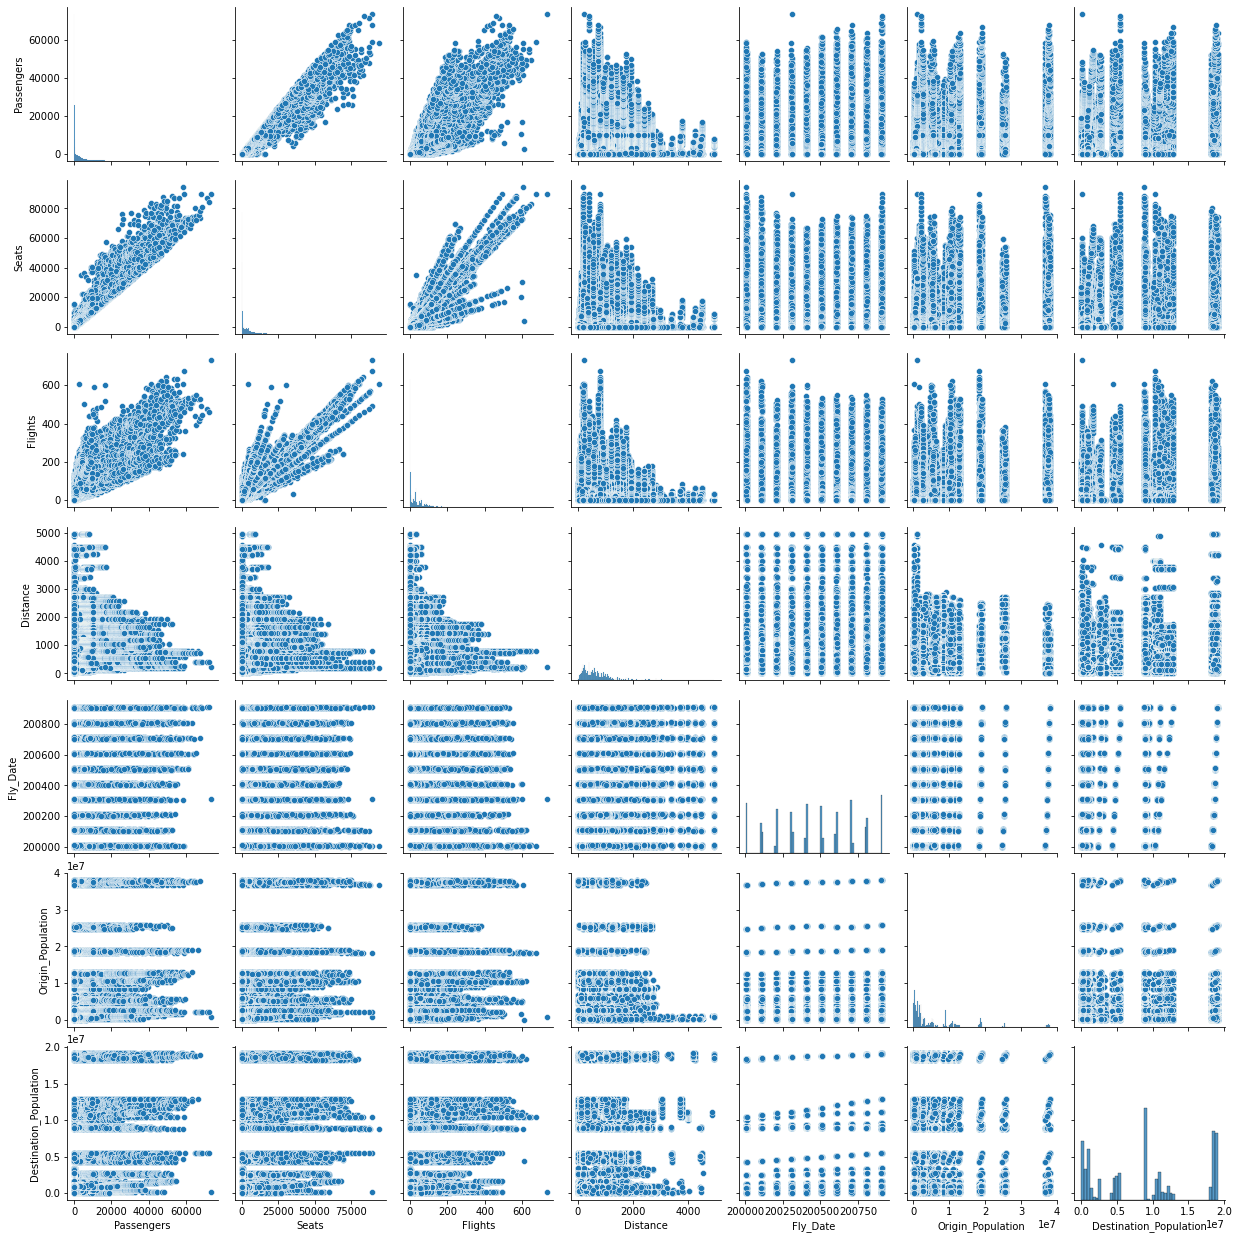

In [16]:
# Create a pairplot to visualize relationships between variables in the flights_clean_df DataFrame
sns.pairplot(flights_clean_df)

# Display the pairplot
plt.show()

The pair plot visualization of variable relationships within the flights_clean_df DataFrame corroborates the findings of the previously shown heatmap.

In [17]:
# Checking for the most visited destination
most_visited_destination = flights_clean_df['Destination_City'].value_counts()
most_visited_destination

Chicago    101329
Atlanta     77210
Dallas      68218
Detroit     60818
Newark      44780
            ...  
Ruston          1
Paris           1
Fremont         1
Bedford         1
Selma           1
Name: Destination_City, Length: 135, dtype: int64

##### Checking for the top 20 most visited destinations

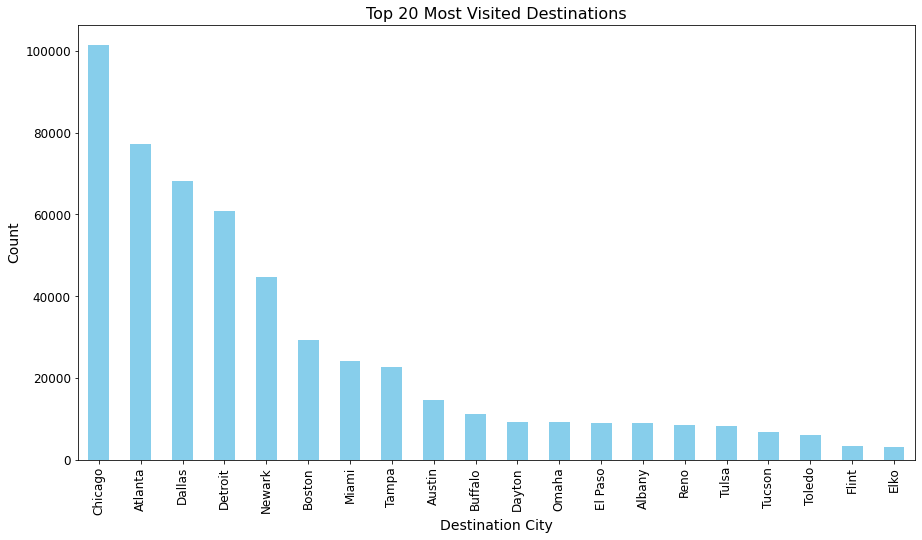

In [18]:
# Create a bar chart with a different color (e.g., 'skyblue')
most_visited_destination.head(20).plot(kind='bar', figsize=(15, 8), color='skyblue')

# Add labels and title for the chart
plt.xlabel('Destination City', fontsize=14)  # Set the x-axis label font size
plt.ylabel('Count', fontsize=14)  # Set the y-axis label font size
plt.title('Top 20 Most Visited Destinations', fontsize=16)  # Set the title font size

# Set the font size for x-axis and y-axis ticks (optional)
plt.xticks(fontsize=12)  # Set the x-axis tick font size
plt.yticks(fontsize=12)  # Set the y-axis tick font size

# Display the bar chart
plt.show()

##### The date that passengers fly the most. 

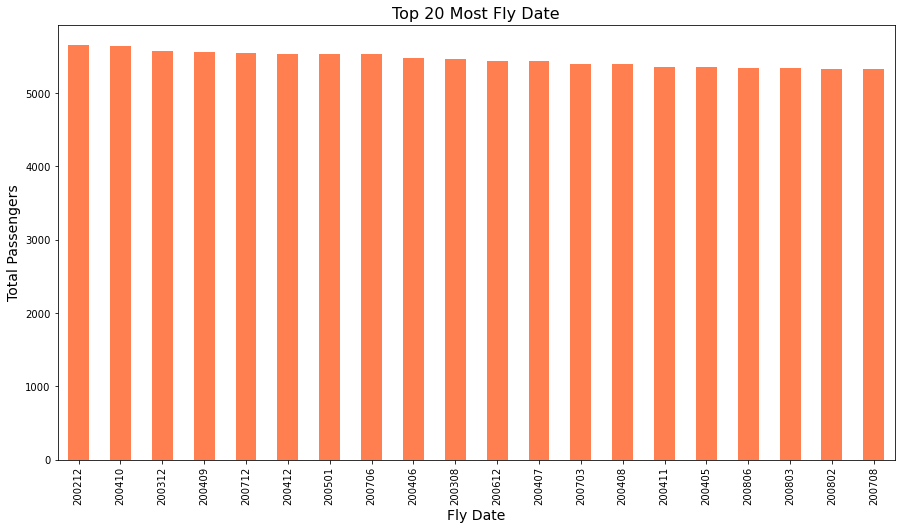

In [19]:
# On which dates did passengers fly the most
max_fly_date = flights_clean_df['Fly_Date'].value_counts()

max_fly_date.head(20).plot(kind='bar', figsize=(15, 8), color='coral')

# Add labels and title for the chart
plt.xlabel('Fly Date', fontsize=14)  # Set the x-axis label font size
plt.ylabel('Total Passengers', fontsize=14)  # Set the y-axis label font size
plt.title('Top 20 Most Fly Date', fontsize=16)  # Set the title font size

plt.show()

In [20]:
# Convert 'Fly_Date' to 'Years (YYYY)'
flights_clean_df['Years'] = flights_clean_df['Fly_Date'].astype(str).str[:4]

# Display the DataFrame with the new column
print(flights_clean_df)

                                ID Origin Destination Origin_City  \
0            AberdeenHuron00200807    ABR         HON    Aberdeen   
1          AberdeenHuron2757200611    ABR         HON    Aberdeen   
2       AberdeenHuron3051170200702    ABR         HON    Aberdeen   
3          AberdeenHuron3076200704    ABR         HON    Aberdeen   
4       AberdeenHuron3121170200706    ABR         HON    Aberdeen   
...                            ...    ...         ...         ...   
581058   ZanesvilleAtlanta00200402    ZZV         PDK  Zanesville   
581059   ZanesvilleAtlanta00200409    ZZV         PDK  Zanesville   
581060   ZanesvilleDetroit00200310    ZZV         YIP  Zanesville   
581061   ZanesvilleDetroit00200312    ZZV         YIP  Zanesville   
581062   ZanesvilleDetroit00200704    ZZV         YIP  Zanesville   

       Origin_State Destination_City Destination_State  Passengers  Seats  \
0                SD            Huron                SD           0      0   
1                

In [21]:
flights_per_year = flights_clean_df['Years'].value_counts()
flights_per_year

2004    64429
2007    63195
2003    62221
2005    61250
2008    61218
2006    59921
2009    57850
2002    51203
2001    50162
2000    49614
Name: Years, dtype: int64

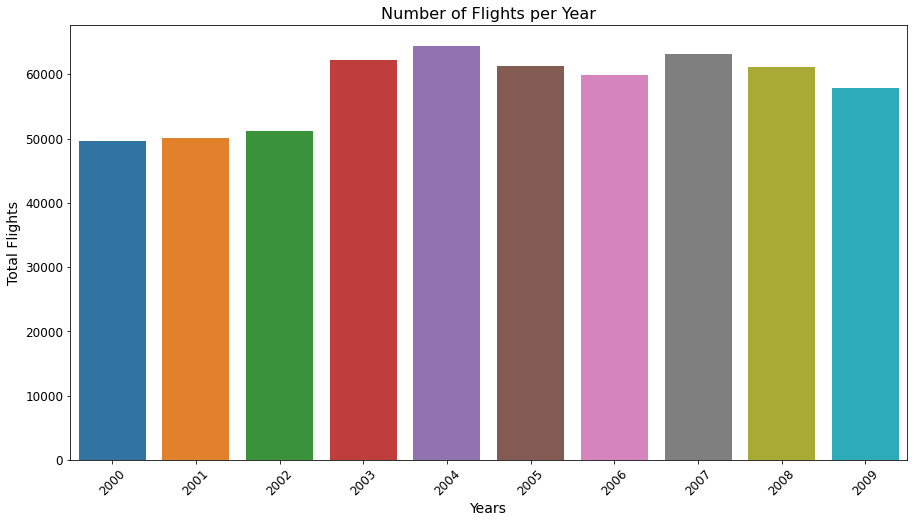

In [22]:
# Sort the 'Years' column in ascending order
sorted_years = sorted(flights_clean_df['Years'].unique())

# Create a barplot for flights per year using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x=flights_per_year.index, y=flights_per_year.values, ci=99, order=sorted_years)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Total Flights', fontsize=14)
plt.title('Number of Flights per Year', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Regional Classification:

* Classify regions (e.g., West, Midwest, etc.). using states or city locations to assign regions.
* Create a new column in your DataFrame that classifies each flight's origin and destination into their respective regions.
* Examine how population differences in origin and destination cities correlate with flight patterns.
* Calculate statistics or create visualizations that show how flight patterns relate to city population sizes.

In [23]:
text = flights_clean_df['Origin_State'].unique()
print(text)

['SD' 'TX' 'OH' 'NM' 'NY' 'GA' 'OR' 'LA' 'MN' 'PA' 'MI' 'OK' 'AK' 'SC'
 'IN' 'AL' 'WI' 'NC' 'TN' 'NJ' 'ME' 'CA' 'MD' 'AR' 'WA' 'MT' 'ND' 'IL'
 'MA' 'KY' 'MO' 'CT' 'UT' 'VT' 'IA' 'WY' 'WV' 'VA' 'CO' 'MS' 'KS' 'DE'
 'NV' 'AZ' 'FL' 'NE' 'HI' 'ID' 'NH' 'RI' 'DC']


In [24]:
# Using column 'Origin_State' and 'Destination_State' for states, ccreating a function that classify regions based on states. For example, West, Midwest, etc.
def classify_region(state):
    state_list = list(state)
    #print(len(state_list))
    region_list = []
    for stat in state_list:
        stat = stat.strip()
        if stat in ['IL', 'IA', 'WI', 'MI', 'IN', 'OH', 'MO', 'KS', 'NE', 'SD', 'ND', 'MN']:
            region_list.append('Midwest')
        elif stat in ['CA', 'OR', 'WA', 'ID', 'MT', 'WY', 'NV', 'UT', 'CO', 'AK', 'HI']:
            region_list.append('West')   
        elif stat in ['MD', 'DE', 'NJ', 'PA', 'NY', 'VT', 'NH', 'CT', 'RI', 'MA', 'DC', 'ME']:
            region_list.append('Northeast')
        elif stat in ['AZ', 'NM', 'TX', 'OK']:
            region_list.append('Southwest')
        elif stat in ['AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'GA', 'FL', 'SC', 'NC', 'VA', 'WV']:
            region_list.append('Southeast')
        else:
            print(stat)
    
    #print(len(region_list))   
    return region_list

In [25]:
# Apply the 'classify_region' function to the 'Origin_State' column and store the result in 'origin_region_list'.
origin_region_list = classify_region(flights_clean_df['Origin_State'])

# Apply the 'classify_region' function to the 'Destination_State' column and store the result in 'destination_region_list'.
destination_region_list = classify_region(flights_clean_df['Destination_State'])

In [26]:
# Assign the 'origin_region_list' values to a new column 'Origin_Region' in the 'flights_clean_df' DataFrame.
flights_clean_df['Origin_Region'] = origin_region_list

# Assign the 'destination_region_list' values to a new column 'Destination_Region' in the 'flights_clean_df' DataFrame.
flights_clean_df['Destination_Region'] = destination_region_list

flights_clean_df.head(100)

ID Origin Destination Origin_City Origin_State  \
0         AberdeenHuron00200807    ABR         HON    Aberdeen           SD   
1       AberdeenHuron2757200611    ABR         HON    Aberdeen           SD   
2    AberdeenHuron3051170200702    ABR         HON    Aberdeen           SD   
3       AberdeenHuron3076200704    ABR         HON    Aberdeen           SD   
4    AberdeenHuron3121170200706    ABR         HON    Aberdeen           SD   
..                          ...    ...         ...         ...          ...   
95  AberdeenPierre7031666200209    ABR         PIR    Aberdeen           SD   
96  AberdeenPierre7091666200110    ABR         PIR    Aberdeen           SD   
97  AberdeenPierre7181938200507    ABR         PIR    Aberdeen           SD   
98  AberdeenPierre7201734200112    ABR         PIR    Aberdeen           SD   
99  AberdeenPierre7241360200410    ABR         PIR    Aberdeen           SD   

   Destination_City Destination_State  Passengers  Seats  Flights  Distance  \
0             Huron                SD           0      0        1        74   
1             Huron                SD          27     57        3        74   
2             Huron                SD         305   1170       39        74   
3             Huron                SD          30     76        4        74   
4             Huron                SD         312   1170       39        74   
..              ...               ...         ...    ...      ...       ...   
95           Pierre                SD         703   1666       49       117   
96           Pierre                SD         709   1666       49       117   
97           Pierre                SD         718   1938       57       117   
98           Pierre                SD         720   1734       51       117   
99           Pierre                SD         724   1360       40       117   

    Fly_Date  Origin_Population  Destination_Population Years Origin_Region  \
0     200807              38991                   15946  2008       Midwest   
1     200611              38886                   15501  2006       Midwest   
2     200702              39026                   15760  2007       Midwest   
3     200704              39026                   15760  2007       Midwest   
4     200706              39026                   15760  2007       Midwest   
..       ...                ...                     ...   ...           ...   
95    200209              39116                   19250  2002       Midwest   
96    200110              39401                   19121  2001       Midwest   
97    200507              38943                   19538  2005       Midwest   
98    200112              39401                   19121  2001       Midwest   
99    200410              38931                   19459  2004       Midwest   

   Destination_Region  
0             Midwest  
1             Midwest  
2             Midwest  
3             Midwest  
4             Midwest  
..                ...  
95            Midwest  
96            Midwest  
97            Midwest  
98            Midwest  
99            Midwest  

[100 rows x 17 columns]

In [28]:
# Save the new 'flights_clean_df' DataFrame to a new 'flights_region' CSV file
output_file = '../data/flights_region.csv'
flights_clean_df.to_csv(output_file, index=False)

print(f"Duplicates removed. Saved to {output_file}")

Duplicates removed. Saved to ../data/flights_region.csv


In [29]:
text = flights_clean_df['Origin_Region']
print(len(text))

581063


In [30]:
# Check data types of 'Years' and 'Flights' columns
print("Data Types:\n", flights_clean_df[['Years', 'Flights']].dtypes)

Data Types:
 Years      object
Flights     int64
dtype: object


In [31]:
# Check for missing values in the DataFrame
missing_values = flights_clean_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ID                        0
Origin                    0
Destination               0
Origin_City               0
Origin_State              0
Destination_City          0
Destination_State         0
Passengers                0
Seats                     0
Flights                   0
Distance                  0
Fly_Date                  0
Origin_Population         0
Destination_Population    0
Years                     0
Origin_Region             0
Destination_Region        0
dtype: int64


#### To identify regional variations in flight patterns for flights from the West to the Midwest and compare them to flights from other regions.

In [32]:
# Group the data by the 'Origin_Region' and 'Destination_Region' columns.
grouped_data = flights_clean_df.groupby(['Origin_Region', 'Destination_Region'])

# Calculate aggregates (e.g., total flights) for each group. 
regional_flight_counts = grouped_data['Flights'].sum()

In [38]:
print(regional_flight_counts)

Origin_Region  Destination_Region
Midwest        Midwest               3280803
               Northeast              848114
               Southeast             1035418
               Southwest              791198
               West                    33013
Northeast      Midwest               1663495
               Northeast             1475800
               Southeast             1195966
               Southwest              353279
               West                      158
Southeast      Midwest               1462781
               Northeast              880081
               Southeast             2529025
               Southwest             1017904
               West                     7815
Southwest      Midwest                625786
               Northeast              196463
               Southeast              546149
               Southwest             2087847
               West                    82117
West           Midwest                750978
               Northe

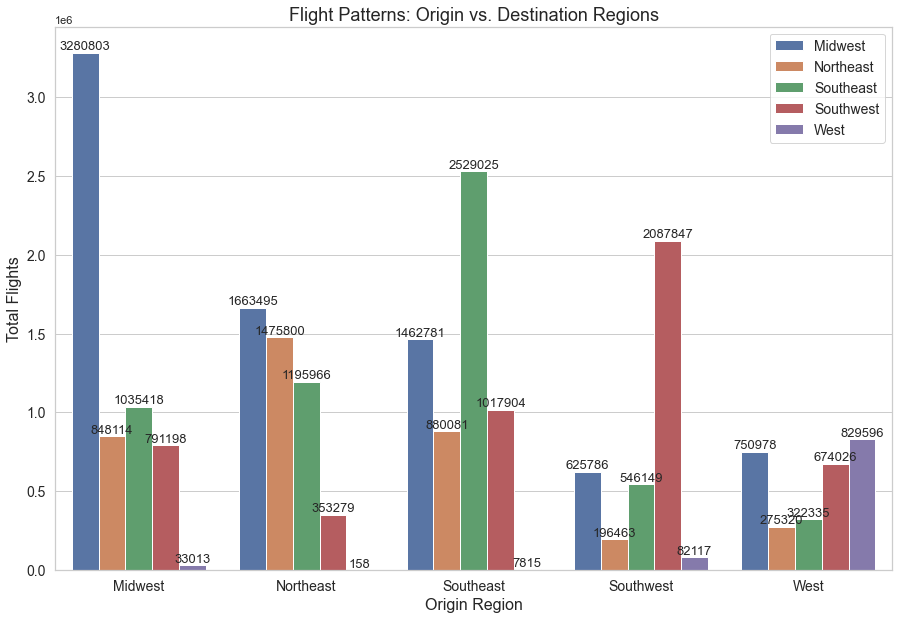

In [33]:
# Create a barplot to compare flight counts by region pairs
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='Origin_Region', y='Flights', hue='Destination_Region', data=regional_flight_counts.reset_index())

# Increase the size of axis labels
plt.xlabel('Origin Region', fontsize=16)
plt.ylabel('Total Flights', fontsize=16)
plt.title('Flight Patterns: Origin vs. Destination Regions', fontsize=18)

# Increase the size of axis tick labels
plt.xticks(fontsize=14)  # Increase the x-axis tick label size
plt.yticks(fontsize=14)  # Increase the y-axis tick label size

# Increase the size of axis values (tick values)
plt.tick_params(axis='both', which='both', labelsize=14)  # Increase the size of axis values

# Add bar labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=13)
    
# Increase the legend fontsize
ax.legend(fontsize=14)

plt.show()

Based on the analysis of flight patterns from 2000 to 2009, we observe the following:
* A higher volume of flights connects cities within the Midwest, Southeast, Southwest, and West regions.
* However, in the case of the Northeast region, there is a higher volume of flights connecting it to the Midwest region rather than within the Northeast itself.
* There are less travelling in within the West region and to other regions.